2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# The dataset

## File descriptions

* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column

## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

In [1]:
!pip install --upgrade pip
!pip install xgboost
!pip install seaborn

Requirement already up-to-date: pip in /usr/local/lib/python3.5/dist-packages (10.0.1)


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import xgboost as xgb
# from sklearn import preprocessing
# from sklearn import linear_model
from sklearn.ensemble import ExtraTreesClassifier
# from xgboost.sklearn import XGBClassifier
from pandas.plotting import parallel_coordinates
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

plt.style.use('seaborn-dark-palette')

In [3]:
filepath = 'Data/'
filename_train = 'train.csv'
filename_test = 'test.csv'

# Load training datset
train = pd.read_csv(filepath + filename_train)
train.head()

# Load test dataset
test = pd.read_csv(filepath + filename_test)

# Merge dataset
dataset = pd.concat([train, test])

Now let's fix the Id column as index for the entire dataset.

In [4]:
train.set_index('Id', inplace=True)

In [5]:
test.set_index('Id', inplace=True)

In [6]:
dataset.set_index('Id', inplace=True)

### How many feature are there?
The following queries will describe some initial characteristics in the dataset how many training example how many predictors, target value there are and so on.

In [7]:
# Columns for train dataset
numericCol_train = train.select_dtypes(include=[np.number]).columns
categoCol_train = train.select_dtypes(exclude=[np.number]).columns

# Columns for test dataset
numericCol_test = test.select_dtypes(include=[np.number]).columns
categoCol_test = test.select_dtypes(exclude=[np.number]).columns

In [8]:
print ('There are {} taining and {} test records which sale price is unknown.'.format(len(train), len(test)))
print ()

print ('In the TRAIN dataset there are {} features which target is called {}' \
       .format(len(train.columns)-1, train.iloc[:,-1].name))
print ('The features in train set are split into\n - {} numerical predicators \n - {} categorical'\
       .format(len(numericCol_train), len(categoCol_train)))

print ()
print ('In the TEST dataset there are {} features' \
       .format(len(test.columns)-1))
print ('The features in test set are split into\n - {} numerical predicators \n - {} categorical'\
       .format(len(numericCol_test), len(categoCol_test)))

There are 1200 taining and 260 test records which sale price is unknown.

In the TRAIN dataset there are 79 features which target is called SalePrice
The features in train set are split into
 - 37 numerical predicators 
 - 43 categorical

In the TEST dataset there are 78 features
The features in test set are split into
 - 36 numerical predicators 
 - 43 categorical


Of courser there exist -1 numerical feature because the target column SalePrice is unknown in test set. Let's continue  describing and go deeper into each datasets.

In [9]:
# How mnay null values are in train set
null_val = train.isnull().sum()
null_val[null_val>0]

LotFrontage      210
Alley           1125
MasVnrType         6
MasVnrArea         6
BsmtQual          32
BsmtCond          32
BsmtExposure      33
BsmtFinType1      32
BsmtFinType2      33
FireplaceQu      564
GarageType        67
GarageYrBlt       67
GarageFinish      67
GarageQual        67
GarageCond        67
PoolQC          1196
Fence            973
MiscFeature     1153
dtype: int64

In [10]:
train['SalePrice'].describe()

count      1200.000000
mean     181414.628333
std       81070.908544
min       34900.000000
25%      129900.000000
50%      163700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

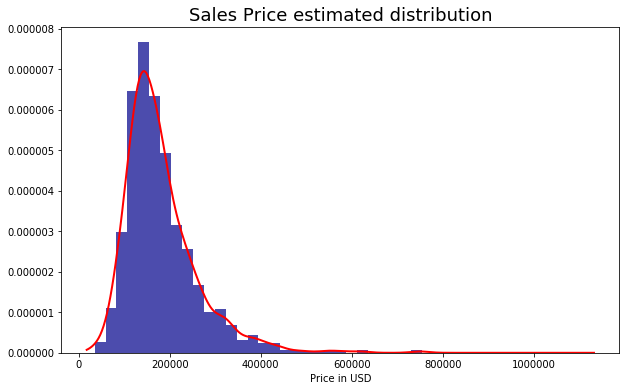

In [11]:
minVal = train['SalePrice'].min()
maxVal = train['SalePrice'].max()

# Non parametric density (gaussian kernel approximation)
nparam_density = stats.kde.gaussian_kde(train['SalePrice'].values.ravel())
x = np.linspace(minVal * 0.5, maxVal * 1.5, 300)
nparam_density = nparam_density(x)


# Sales Price Histogram and gaussian kernel approx
fig = plt.subplots(figsize=(10, 6))
plt.hist(train['SalePrice'].values, bins=30, normed=True, color = 'darkblue', alpha = 0.7)
plt.plot(x, nparam_density, 'r-', lw=2, label='non-parametric density (smoothed by Gaussian kernel)')
plt.title('Sales Price estimated distribution', fontsize = 18)
plt.xlabel('Price in USD')
plt.show()

In [12]:
print ('The mean value is {:.3f}'.format(train['SalePrice'].mean()))
print ('The median value is {:.3f}'.format(train['SalePrice'].median()))

The mean value is 181414.628
The median value is 163700.000


Few charactistics:
- Unimodal (one peak)
- Right skew sample

You can get a general impression of skewness by drawing a histogram but you cannot generalize about population *(remember our goal is to infer a house price in a Population)*. Before that, we need to compute if the sales price population data also tend to follow a skew distribution (for more details follow this __[link](https://brownmath.com/stat/shape.htm)__).


**Inferring**


The dataset is one sample drawn from a population. Sometimes the sample may be skewed but the population may not (could be symmetric). 
In order to try to answer this question Test Statistics come to my mind. 

Test Statistics are very useful to infer from a sample a variable which is representative in a population (mean, standard deviation, etc). At the end there will exist some grade of uncertainty in the population variable of interest and that's why the conclusion is based in terms of probability such as it is very likely that the the population is skewed or not.



In [13]:
def test_stats_skewness(x):
    '''Inferring Skewness at Population
    n = number of samples
    g1 = Measure of skewness 
    SES = stardard error of skewness
    Z = Test statistics
    '''
    # numbers of samples
    n = len(x)
    # Third moment of the train
    m3 = sum((x - x.mean())**3)/n
    # Variance
    m2 = sum((x - x.mean())**2)/n
    # skewness
    g1 = m3 / m2**(3/2)
    # sample skewness (different from population skweness)
    sampleSkew = math.sqrt(n * (n-1)) * g1 / (n-2)
    # Test statistics
    SES = math.sqrt(6*n*(n-1)/((n-2)*(n+1)*(n+3)))
    Z = sampleSkew / SES
    
    return Z, sampleSkew

In [14]:
testStat, skew = test_stats_skewness(train['SalePrice'])
print ('The skewness is: {:.4f}'.format(skew))
print ('The test statistics at 5% sign level of confidence is {:.3f}'.format(testStat))

The skewness is: 1.9672
The test statistics at 5% sign level of confidence is 27.855


#### Interpretation
- A Positive value greater than 1 means the distribution is highly skewed to the right but we are not sure if population is also skew.
- The test statistics indicates the population is very likely to be skewed positively (greater than 2).
- In simple terms, few people can afford luxury and expensive houses and a large amount or citizens can buy homes which prices oscilate around 163700 USD.

#### Correlation
Spearman correlation not to conclude something about some features but more to have a good understanding about the data.

In [ ]:
# Catch numerical columns
numericalData = train._get_numeric_data()

# Spearman correlation
Corr = numericalData.corr(method='spearman')

In [ ]:
# Draw a heatmap with spearman correlation
f = plt.subplots(figsize=(20, 13))
sns.heatmap(Corr[::-1], annot=True, annot_kws={"size": 7}, linewidths=.003, cmap='mako')
# sns.clustermap(Corr, cmap='mako', metric="correlation")

For more information how to scale variables in python __[link](http://benalexkeen.com/feature-scaling-with-scikit-learn/)__.

In [ ]:
# numericalData = numericalData.fillna(-1)

# # Binning target column
# bins = [1, 50000, 250000, 400000,10000000]
# labels = [1,2,3,4]
# numericalData['binPrice'] = pd.cut(numericalData.SalePrice, bins, labels=labels)

In [ ]:
# plot_DF = numericalData.loc[:,('LotArea','1stFlrSF', 'GrLivArea', '2ndFlrSF', \
#                                   'TotRmsAbvGrd', 'binPirce')]

# # Plot parallel coordinates
# plt.figure(figsize=(20, 10))
# parallel_coordinates(plot_DF, class_column='binPrice', cols=plot_DF.columns[:-1], colormap=plt.get_cmap('Set2'))
# plt.yscale('symlog')
# plt.show()

### Categorical

- House floor area = second floor are -> regular ones
- Not all houses have second floor.
- Ground living area is related to number of total rooms.
- Second floor is linked price of house.

In [ ]:
# # Ratio of price per total lote ft^2
# pricesq = target / train['LotArea']

# # Median and std (Price / ft^2) per neighborhood
# priceNeighbor = pd.concat([train['Neighborhood'], pricesq], keys=['Neighborhood', 'medianPricesq'], axis=1)\
#                     .groupby(['Neighborhood'])\
#                     .agg(['median'])\
#                     .reset_index()

# # Delete one level index
# priceNeighbor.columns = priceNeighbor.columns.droplevel(1)
# # SortDF
# sortDF = priceNeighbor.sort_values(by='medianPricesq')

# # Importane of variable
# slope, intercept, r_value, _, _ = stats.linregress(np.log(pricesq), target.values)

# # Plot
# plt.subplots(figsize=(10, 5))
# plt.plot(np.arange(len(sortDF)), round(sortDF['medianPricesq']))
# plt.title('Price per ft^2')
# plt.xlabel('Neighborhoods')
# plt.ylabel('Ratio price per ft^2')
# plt.xticks(np.arange(len(sortDF)), sortDF.iloc[:,0], rotation=70)
# plt.show()

# Data Exploration

## Numerical data

In [ ]:
quartile = train['SalePrice'].quantile([.25, .75, 0.95])
quartile

In [ ]:
# creating bins as quartile
bins = quartile.tolist()
bins.insert(0, 0)
bins.append(train['SalePrice'].max() + 1)

'''Labels are organized as following:
L  : low price
M  : medium price
H  : high price
EH : extreme high price'''
labels = ['L','M','H','EH']

# binning in categories
train['bin'] = pd.cut(train['SalePrice'], bins=bins, labels=labels)
train[['SalePrice','bin']].head()

In [ ]:
# Plot
var = train.drop(['SalePrice'], axis=1).select_dtypes(include=[np.number]).columns
mx = pd.melt(train, id_vars=['SalePrice', 'bin'], value_vars=var)

pt1 = sns.FacetGrid (mx, col='variable',\
                    hue='bin',\
                    palette='Set1',\
                    hue_order=['EH','H','M','L'],\
                    col_wrap=4, sharex=False, sharey=False)

pt1 = (pt1.map(plt.scatter, 'value', 'SalePrice',\
          marker='v',\
          alpha=0.8).add_legend())
pt1

## Categorical data

In [ ]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
pt2 = sns.FacetGrid (p, col='variable',\
                     col_wrap=3,\
                     sharex=False, sharey=False, size=5)

pt2 = pt2.map(boxplot, 'value', 'SalePrice')
pt2

# Cleaning data

## Null values and inconsistencies

Is there null values?

Check columns where there are null values

In [ ]:
def checkMissingData(inputDF):
    # Checking the columns with missing data
    nullData = inputDF.isnull().sum().sort_values(ascending=False)
    percent = (inputDF.isnull().sum()/inputDF.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([nullData, percent], axis=1, keys=['Total', 'Percent'])

    # Selecting the columns with the missing data
    missing_inputDF = missing_data.loc[missing_data['Total'] > 0]
    print(missing_inputDF.count())
    
    return missing_inputDF

In [ ]:
missing = checkMissingData(dataset)
missing_list = list(missing.index)

Check type variables which contain null

In [ ]:
# Checking the types of the columns with missing data
dataset[missing_list].dtypes

In [ ]:
# Fill PoolQC values with None
dataset['PoolQC'] = dataset['PoolQC'].fillna(value='None')

# Fill NaN MasVnrArea with 0
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(value=0)

# Some values from Garage Year Built are missing. We will fill it
# wiith the same year of construction
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(value=dataset['YearBuilt'])

In [ ]:
# Computing the median Lot Frontage per Neighborhood
lot_frontage_median = dataset[['Neighborhood', 'LotFrontage']]\
                    .groupby(['Neighborhood'])\
                    .agg(['median'])\
                    .reset_index()
# Creating a dictionary from the Lot Frontage per Neighborhood
lot_dict = lot_frontage_median.set_index('Neighborhood').to_dict()
# Replacing NaN values using the dictionary
lot_frontage_clean = dataset.LotFrontage.fillna(dataset.Neighborhood.map(lot_dict[('LotFrontage', \
                                                                             'median')]))
# Replacing the Lot Frontage column with the cleaned column
dataset['LotFrontage'] = lot_frontage_clean

In [ ]:
# Splitting missing values by dtype
data_object = dataset[missing_list].select_dtypes(include='object')
object_list = list(data_object)
data_float = dataset[missing_list].select_dtypes(include='float')
float_list = list(data_float)

In [ ]:
# Function to replace values from columns with object type
def replaceObjectData(inputDF, missing_list):
    for col in missing_list:
        # NaN values replaced with 'None'
        clean_data = inputDF[col].fillna(value = 'None')
        inputDF[col] = clean_data
    return inputDF

data_object = replaceObjectData(data_object, object_list)

In [ ]:
# Function to replace values from columns with float type
def replaceFloatDafig(inputDF, missing_list):
    for col in missing_list:
        # NaN values replaced with the mean of the column to avoid skewed data
        clean_data = inputDF[col].fillna(value = 0)
        inputDF[col] = clean_data
    return inputDF

data_float = replaceObjectData(data_float, float_list)

In [ ]:
# Replace values from original dataframe with corrected ones
dataset[object_list] = data_object
dataset[float_list] = data_float

In [ ]:
train = pd.concat([dataset[:1200], train['bin']], axis=1)
test = dataset[-260:]

## Remove outliers

In [ ]:
'''Parameters to play by user
   --------------------------'''
cat = 'LotArea'
contamination = 0.003

# fit the model
clf = IsolationForest(contamination=contamination, random_state=np.random.RandomState(1234))
clf.fit(train[cat].values.reshape(-1,1))
y_pred = clf.predict(train[cat].values.reshape(-1,1))

# Index outliers
idx = np.where(y_pred < 0)

# Plot data and outliers
sns.pairplot(x_vars=[cat],\
             y_vars=['SalePrice'],\
             data=train,\
             hue='bin', size=6)
plt.scatter(train[cat].iloc[idx],\
            train['SalePrice'].iloc[idx],\
            marker='x', s=300, c='r')

In [ ]:
# Definition of variable and contamination
catOutliers = [('LotFrontage', 0.005),\
               ('MasVnrArea', 0.005),\
               ('BsmtFinSF1', 0.0005),\
               ('BsmtFinSF2', 0.0005),\
               ('BsmtUnfSF', 0.0005),\
               ('TotalBsmtSF', 0.003),\
               ('1stFlrSF', 0.0015),\
               ('2ndFlrSF', 0.0015),\
               ('GrLivArea', 0.002),\
               ('GarageArea', 0.002),\
               ('WoodDeckSF', 0.002),\
               ('OpenPorchSF', 0.002),\
               ('EnclosedPorch', 0.0005),\
               ('MiscVal', 0.0005)
              ]

# # Definition of variable and contamination
# catOutliers = [('LotFrontage', 0.005),\
#                ('LotArea', 0.003),\
#                ('MasVnrArea', 0.005),\
#                ('BsmtFinSF1', 0.0005),\
#                ('BsmtFinSF2', 0.0005),\
#                ('BsmtUnfSF', 0.0005),\
#                ('TotalBsmtSF', 0.003),\
#                ('1stFlrSF', 0.0015),\
#                ('2ndFlrSF', 0.0015),\
#                ('GrLivArea', 0.002),\
#                ('GarageArea', 0.002),\
#                ('WoodDeckSF', 0.002),\
#                ('OpenPorchSF', 0.002),\
#                ('EnclosedPorch', 0.0005),\
#                ('MiscVal', 0.0005)
#               ]

idx = np.empty(())
for var, contam in catOutliers:
    
    # fit the model
    clf = IsolationForest(contamination=contam, random_state=np.random.RandomState(1234))
    clf.fit(train[var].values.reshape(-1,1))
    outliers = clf.predict(train[var].values.reshape(-1,1))

    # Index outliers
    idx = np.where(outliers < 0)
    
    # Drop all rows wihich match with idx
    train = train.drop(train.index[idx])

Some aditional outliers deletion

In [ ]:
idx = np.where(\
             ((train['SalePrice'] > 350000) & (train['OverallCond'] < 2.5)) |\
             ((train['SalePrice'] > 600000) & (np.logical_and(train['OverallCond']>5, train['OverallCond']<7.5)))\
            )
train = train.drop(train.index[idx[0]])

# Feature Engineering

## Numerical

#### Total number of bathrooms

#### Agragate all bathrooms

In [ ]:
def combine_bathrooms(inputDF, plot=False):
    
    # Select all column that contain bath in house
    BathVar = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
    totalBath = inputDF.loc[:, BathVar]
    
    # agregatate all column
    totalBath = totalBath.sum(axis=1)
    
    # Binning total bath greater than 4
    totalBath_bins = totalBath.where(totalBath <= 4, 4)
    
    if plot is True:
        pd1 = pd.concat([totalBath.rename('x'),
                        inputDF['SalePrice'].rename('y'),
                        inputDF['bin'].rename('name')], axis=1)
#         fig = plt.figure(figsize=(14,4))
#         plt.subplot(1,2,1)
        for x, y, name in pd1.iterrows():
            print (pd1.x, pd1.y, pd1.name)
#             plt.plot(x, y, 'o', label=name)
#         plt.subplot(1,2,2)
#         plt.plot(totalBath_bins, inputDF['SalePrice'], '.')
        
#     # Concatenate with inputDF
#     inputDF = pd.concat([inputDF, totalBath_bins.rename('TotalBath_bins')], axis=1)
    
#     # Convert to numeric
#     inputDF['TotalBath_bins'] = inputDF['TotalBath_bins'].astype('int64')

#     # Drop all bathrooms variables
#     inputDF = inputDF.drop(columns = BathVar)
    
    return pd1

In [ ]:
train = combine_bathrooms(train, plot=True)
# test = combine_bathrooms(test, plot=False)

In [ ]:
train.y

#### Age of building

In [ ]:
def create_age(inputDF, plot=False):
    
    # Age og house
    age = inputDF['YrSold'] - inputDF['YearRemodAdd']
    
    if plot is True:
        plt.figure(figsize=(7,4))
        plt.plot(age, inputDF['SalePrice'], '.')
        
    # Concatenate with inputDF
    inputDF = pd.concat([inputDF, age.rename('BuildAge')], axis=1)

    # Drop all bathrooms variables
    inputDF = inputDF.drop(columns = ['YrSold', 'YearRemodAdd'])
    
    return inputDF

In [ ]:
train = create_age(train, plot=True)
test = create_age(test, plot=False)

#### Agregate all first and second floor area

In [ ]:
def agg_floors(inputDF, plot=False):
    
    AreaVar = ['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF']
    totalLivingArea = inputDF[AreaVar[0]] + inputDF[AreaVar[1]] + inputDF[AreaVar[2]]
    
    if plot is True:
        plt.figure(figsize=(7,4))
        plt.plot(totalLivingArea, inputDF['SalePrice'], '.')
        
    # Concatenate with inputDF
    inputDF = pd.concat([inputDF, totalLivingArea.rename('TotLivingArea')], axis=1)

    # Drop all bathrooms variables
    inputDF = inputDF.drop(columns = AreaVar)
    
    return inputDF

In [ ]:
train = agg_floors(train, plot=True)
test = agg_floors(test, plot=False)

#### Agregate all porch variables

In [ ]:
def agg_porch(inputDF, plot=False):
    
    porchVar = ['EnclosedPorch','3SsnPorch','ScreenPorch']
    porch = np.sum(inputDF[porchVar], axis=1)
    
    if plot is True:
        plt.plot(porch, inputDF['SalePrice'], '.')

    # Concatenate with inputDF
    inputDF = pd.concat([inputDF, porch.rename('Porch')], axis=1)

    # Drop all bathrooms variables
    inputDF = inputDF.drop(columns = porchVar)
    
    return inputDF

In [ ]:
train = agg_porch(train, plot=True)
test = agg_porch(test, plot=False)

### Drop some variables

Keep GarageCars, GarageArea, GarageType, GarageQual

In [ ]:
def drop_car_var(inputDF):
    
    cars = ['GarageFinish', 'GarageQual', 'GarageCond']

    # Drop all bathrooms variables
    inputDF = inputDF.drop(columns = cars)
    
    return inputDF

In [ ]:
train = drop_car_var(train)
test = drop_car_var(test)

### Categorical

In [ ]:
def plot_categorical_data(cateVar, target='SalePrice', col_wrap=4, size=4, rotat_label=False):
    
    '''Personalized bar plot (adding text)'''
    def make_bar(dataX, dataY, counts, **kwargs):
        
        pal = sns.color_palette('RdYlBu', len(dataX))
        g = sns.barplot(x=dataX,y=dataY, palette=np.array(pal[::-1]))
        
        if rotat_label is True:
            dataX = plt.xticks(rotation=45)
            
        # Add text
        x = g.patches
        for x, y in zip(x, counts):
            g.text(0.5*x.get_width()+x.get_x(), x.get_height(), y, ha='center')
    
    '''For each categorical feature the median 
    and how many samples per inner categories are computed'''
    mergeCateDF = pd.DataFrame()
    for cate_name in cateVar:
        tempDF = train[[cate_name, target]].groupby([cate_name]).agg(['count'])
        
#     a = tempDF.groupby(['bin']).agg(['count'])
    print (tempDF)
    
        
#         # Group each category to agg by median SalePrice value and count
#         tempDF = train[[cate_name, target]]\
#                     .groupby([cate_name])\
#                     .agg(['median', 'count'])\
#                     .reset_index() 
                    
#         # Delete one level index
#         tempDF.columns = tempDF.columns.droplevel()
        
#         # Rename all columns
#         tempDF.columns = ['cate', target, 'counts']
        
#         # Insert category name
#         tempDF.insert(loc=0, column='name', value=cate_name)
        
#         # Merge all categories
#         mergeCateDF = mergeCateDF.append([tempDF])

#     # Plot           
#     pltCate = sns.FacetGrid (mergeCateDF, col='name', palette='Set1',\
#                              col_wrap=col_wrap, sharex=False, sharey=False, size=size)

#     return pltCate.map(make_bar,'cate',target,'counts') 

In [ ]:
# # Retrieve all categorical columns
# categoCol = train.select_dtypes(exclude=[np.number]).columns

# cate2Var = ['MSSubClass','MSZoning','Exterior1st','Exterior2nd','Neighborhood']
# cate1Var = [x for x in list(categoCol) if x not in cate2Var]


# # Plot first group of categorical data
# plot_categorical_data(cate1Var, target='SalePrice', col_wrap=4, size=3, rotat_label=True)

In [ ]:
# # Plot second group cateogical data
# plot_categorical_data(cate2Var, target='SalePrice', col_wrap=2, size=5, rotat_label=True)

### Transforming Categorical data

In [ ]:
def transf_categorical_data(inputDF):
    
    # Map definition for some categorical values to ordinal numbers
    qualities = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    
    categories = ['PoolQC','FireplaceQu','BsmtQual',\
                 'BsmtCond','KitchenQual','HeatingQC',\
                 'ExterQual','ExterCond']
    
    # Loop to map categorical values which share same qualities 
    for categ in categories:
        inputDF[categ] = inputDF[categ].map(qualities)

    # Map categorical feautres independently and according to inputDF information
    inputDF['LotShape'] = inputDF['LotShape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3})
    inputDF['BsmtExposure'] = inputDF['BsmtExposure'].map({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
    inputDF['BsmtFinType1'] = inputDF['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2,\
                                                     'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
    inputDF['BsmtFinType2'] = inputDF['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2,\
                                                     'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
    inputDF['MasVnrType'] = inputDF['MasVnrType'].map({'None':0, 'BrkCmn':0, 'BrkFace':1, 'Stone':2})
    inputDF['Functional'] = inputDF['Functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3,\
                                                 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
    inputDF['CentralAir'] = inputDF['CentralAir'].map({'N':0, 'Y':1})
    inputDF['LandSlope'] = inputDF['LandSlope'].map({'Sev':0, 'Mod':1, 'Gtl':2})
    inputDF['Street'] = inputDF['Street'].map({'Grvl':0, 'Pave':1})
    inputDF['PavedDrive'] = inputDF['PavedDrive'].map({'N':0, 'P':1, 'Y':2})
    
    return inputDF


In [ ]:
train = transf_categorical_data(train)
test = transf_categorical_data(test)

### Feature creation

In [ ]:
def bsmtType1(inputDF):
    
    # Onehot encoding and then multiply by continous variable
    joinBsmType1 = pd.get_dummies(inputDF['BsmtFinType1'], prefix='enc_BsmType1').multiply(inputDF['BsmtFinSF1'], axis=0)
    joinBsmType1 = joinBsmType1.drop(joinBsmType1.columns[[0]], axis=1)
#     print (joinBsmType1[:3])

    # Concatenate with inputDF
    inputDF = pd.concat([inputDF, joinBsmType1], axis=1)

    # Drop columns
    inputDF = inputDF.drop(columns = ['BsmtFinType1', 'BsmtFinSF1'])
    
    return inputDF

In [ ]:
# train = bsmtType1(train)
# test = bsmtType1(test)

In [ ]:
def bsmtType2(inputDF):
    
    # Onehot encoding and then multiply by continous variable
    joinBsmType2 = pd.get_dummies(inputDF['BsmtFinType2'], prefix='enc_BsmType2').multiply(inputDF['BsmtFinSF2'], axis=0)
    joinBsmType2 = joinBsmType2.drop(joinBsmType2.columns[[0]], axis=1)
#     print (joinBsmType2[:3])

    # Concatenate with inputDF
    inputDF = pd.concat([inputDF, joinBsmType2], axis=1)

    # Drop columns
    inputDF = inputDF.drop(columns = ['BsmtFinType2', 'BsmtFinSF2'])
    
    return inputDF

In [ ]:
# train = bsmtType2(train)
# test = bsmtType2(test)

## Likelihood encoding

for more details follow this __[link](https://www.kaggle.com/tnarik/likelihood-encoding-of-categorical-features)__ and the discussion here __[link](https://datascience.stackexchange.com/questions/11024/encoding-categorical-variables-using-likelihood-estimation)__.

In [ ]:
# # Plot results
# nd = pd.melt(dataset, value_vars=varTrans)
# n1 = sns.FacetGrid(nd, col='variable', col_wrap=4, sharex=False, sharey=False)
# n1.map(sns.distplot, 'value')
# n1

In [ ]:
# # Drop all previous categorical data
# dataset = dataset.drop(columns = cat_features)

### One hot Encoding

##### Roof Material
Group variables

Let's start one hot enconding

In [ ]:
cat_features = train.select_dtypes(exclude=[np.number]).columns
cat_features

In [ ]:
cate_rem = ['bin', 'SalePrice']
cat_features = [x for x in list(cat_features) if x not in cate_rem]

In [ ]:
cateDF = pd.DataFrame()
for i in cat_features:
    dummyDF = pd.get_dummies(dataset[[i]], prefix=i, drop_first=True)
    cateDF = pd.concat([cateDF, dummyDF], axis=1)

In [ ]:
oneHot_train = cateDF[:1200]
oneHot_test = cateDF[-260:]

In [ ]:
oneHot_train = pd.DataFrame(oneHot_train, index=train.index.values)

### Concatenate 

In [ ]:
# Concatenate all categorical data converted to numerical ones
train = pd.concat([train, oneHot_train], axis=1)
test = pd.concat([test, oneHot_test], axis=1)

# Drop all previous categorical data
train = train.drop(columns = cat_features)
test = test.drop(columns = cat_features)

In [ ]:
def creation_categorical_feat(inputDF):
    
    # Feature 1
    ft1 = inputDF['MSZoning_RL']*inputDF['Condition2_Norm']
    # Feature 2
    ft2 = inputDF['MSZoning_RL']*inputDF['Alley_None']
    # Feature 3
    ft3 = inputDF['MSZoning_RL']*inputDF['SaleType_WD']
    # Feature 4
    ft4 = inputDF['Alley_None']*inputDF['LandContour_Lvl']
    # Feature 4
    ft5 = inputDF['MSZoning_RL']*inputDF['LandContour_Lvl']
    # Feature 4
    ft6 = inputDF['MSZoning_RL']*inputDF['LotConfig_Inside']

    # Concatenate all categorical data converted to numerical ones
    inputDF = pd.concat([inputDF, ft1.rename('ft1'), ft2.rename('ft2'),\
                         ft3.rename('ft3'), ft4.rename('ft4'), ft5.rename('ft5'),\
                         ft6.rename('ft6')], axis=1)
    
    return inputDF

In [ ]:
# train = creation_categorical_feat(train)
# test = creation_categorical_feat(test)

Check if there are NaN values

In [ ]:
missing = checkMissingData(test)
missing_list = list(missing.index)
print (missing)

In [ ]:
# # Plot results

# nd = pd.melt(dataset, value_vars=varTrans)
# n1 = sns.FacetGrid(nd, col='variable', col_wrap=4, sharex=False, sharey=False)
# n1.map(sns.distplot, 'value')
# n1

In [ ]:
train.select_dtypes(exclude=[np.number]).columns

In [ ]:
train['SalePrice'] = train['SalePrice'].astype('int64')

## Fast feature selection

In [ ]:
# Select train data and target
X, y = train.drop(['SalePrice', 'bin'], axis=1), train['SalePrice']

# Run classifier
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
features = clf.feature_importances_  

# Concatenate with names
feat_names = pd.DataFrame(data={'importance': features}, index=X.columns)
feat_names = feat_names.sort_values(by='importance', ascending=False)
# Thresold features
thresold = 0.007
Feat_names = feat_names[feat_names['importance'] > thresold]

# Plot
plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(Feat_names)), Feat_names.values)
plt.title('Features sorted by importance', fontsize=24)
plt.xticks(np.arange(len(Feat_names)), Feat_names.index, rotation=85, fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
Feat_names.index

## Select final data

In [ ]:
# Select train data and target
X, y = train.drop(['SalePrice', 'bin'], axis=1), train['SalePrice'].apply(np.log)

In [ ]:
testStat, skew = test_stats_skewness(y)
print ('The skewness is: {:.4f}'.format(skew))
print ('The test statistics at 5% sign level of confidence is {:.3f}'.format(testStat))

### Comments

### Modelling

### Lasso regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle=True,
                                                    test_size=0.20, 
                                                    random_state=42)

## Tunning Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso

lassoMd = Lasso(normalize=True, max_iter=1e5)
param_grid = {'alpha': [0.00065, 0.0006, 0.00055, 0.00003, 0.00003, 0.000005]}

gridLasso = GridSearchCV(lassoMd, param_grid, scoring='neg_mean_squared_error', cv=5)
gridLasso.fit(X, y)

print (gridLasso.best_params_)
print (gridLasso.best_score_)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# 0.000065
# 0.000001
lasso = Lasso(alpha=0.0001, normalize=True, max_iter=1e5)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_train)

error = np.sqrt(mean_squared_error(y_train, y_pred))
print ('Error: {:.6f}'.format(error))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet

alphas = np.array([0.01,0.001, 0.005, 0.008, 0.0001])

# create and fit a ridge regression model, testing each alpha
model = ElasticNet(l1_ratio=.85, normalize=True, max_iter=1e6, random_state=3)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
# print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

In [ ]:
ENet = ElasticNet(alpha=0.0001, l1_ratio=.85, normalize=True, max_iter=1e6)
ENet.fit(X_train, y_train)
y_pred = ENet.predict(X_train)

In [ ]:
error = np.sqrt(mean_squared_error(y_pred, y_train))
error 

## Tunning Xgboost

In [ ]:
# DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# "Learn" the mean from the training data
mean_train = np.mean(y_train)

# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train

# Compute MAE
mae_baseline = np.sqrt(mean_squared_error(y_test, baseline_predictions))

print("Baseline RMSE is {:.4f}".format(mae_baseline))

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':2,
    'min_child_weight': 1,
    'eta':.05,
    'subsample': 1,
    'gamma':0,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
params['eval_metric'] = 'rmse'
num_boost_round = 999

In [ ]:
# model = xgb.train(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     evals=[(dtest, 'Test')],
#     early_stopping_rounds=10
# )

In [ ]:
# print("Best RMSE: {:.4f} with {} rounds".format(
#                  model.best_score,
#                  model.best_iteration+1))

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=15
)

cv_results[:10]

In [ ]:
# cv_results['test-rmse-mean'].min()

### Tune max_depth and min_child_weight

In [ ]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(2,10,2)
    for min_child_weight in range(1,4,2)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=77,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=15
    )

    # Update best RMSE
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].idxmin()
    print("\tRMSE {:.5f} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, RMSE: {:.5f}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['max_depth'] = 2
params['min_child_weight'] = 3

### Tune subsample and colsample_bytree

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(6,10)]
    for colsample in [i/10. for i in range(6,10)]
]

In [ ]:
min_mae = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))

    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=15
    )

    # Update best score
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {:.5f} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)

print("Best params: {}, {}, RMSE: {:.5f}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['subsample'] = 0.8
params['colsample'] = 0.5

### Tune gamma

In [ ]:
%time
#This can take some time…
min_mae = float("Inf")
best_params = None

for gamma in [0,0.1,0.2,0.3,0.4,0.5]:
    print("CV with eta={}".format(gamma))

    # We update our parameters
    params['gamma'] = gamma

    # Run and time CV
    cv_results = xgb.cv(\
            params,\
            dtrain,\
            num_boost_round=num_boost_round,\
            seed=42,\
            nfold=5,\
            metrics=['rmse'],\
            early_stopping_rounds=15)

    # Update best score
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {:.5f} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta

print("Best params: {}, RMSE: {:.5f}".format(best_params, min_mae))

### Tune Learning rate

In [ ]:
%time
#This can take some time…
min_mae = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05, .01, .005, 0.00001]:
    print("CV with eta={}".format(eta))

    # We update our parameters
    params['eta'] = eta

    # Run and time CV
    cv_results = xgb.cv(\
            params,\
            dtrain,\
            num_boost_round=num_boost_round,\
            seed=42,\
            nfold=5,\
            metrics=['rmse'],\
            early_stopping_rounds=15)

    # Update best score
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {:.5f} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta

print("Best params: {}, RMSE: {:.5f}".format(best_params, min_mae))

### Test data

In [ ]:
missing = checkMissingData(test)
missing_list = list(missing.index)
print (missing)

## Stacking and Prediction

In [ ]:
test = test.drop(['SalePrice'], axis=1)

In [ ]:
X_test = test

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y, 
                                                  shuffle=True,
                                                  test_size=0.85, 
                                                  random_state=77)

In [ ]:
# Initializing Lasso model
model_lasso = lasso
model_Enet = ENet

# Initializing XGBoost model
model_xgb = xgb.XGBRegressor(colsample_bytree=0.5, gamma=0, 
                             learning_rate=0.05, max_depth=2, 
                             min_child_weight=3.0, n_estimators=2200,
                             subsample=0.8,
                             random_state =42, nthread = -1)

In [ ]:
# Fit models
model_lasso.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_Enet.fit(X_train, y_train)

# Make predictions
pred_lasso = model_lasso.predict(X_val)
pred_xgb = model_xgb.predict(X_val)
pred_Enet = model_Enet.predict(X_val)

Make prediction for test data

In [ ]:
pred_lasso_test = model_lasso.predict(X_test)
pred_xgb_test = model_xgb.predict(X_test)
pred_Enet_test = model_Enet.predict(X_test)

Stacking predictions

In [ ]:
stacked_val = np.column_stack((pred_lasso, pred_Enet, pred_xgb))
stacked_test = np.column_stack((pred_lasso_test, pred_Enet_test, pred_xgb_test))

Specifying meta model

In [ ]:
# Specifying meta model -> Lasso regressor
lasso_meta_model = model_Enet

# Fit  model
lasso_meta_model.fit(stacked_val, y_val)

Final prediction

In [ ]:
pred_final_test_data = lasso_meta_model.predict(stacked_test)

In [ ]:
filepath = 'Data/'
filename = 'train_kaggle.csv'

# Load training datset
xx = pd.read_csv(filepath + filename)
price = np.log(xx.SalePrice[-260:])

In [ ]:
er = np.sqrt(mean_squared_error(pred_final_test_data, price))
er 

In [ ]:
price